# RII_Pandas Tutorial
riip v0.1.0

---

# RiiDataFrame
Let's start your survay of dielectric properties of various materials. The first thing you must do is to create a RiiDataFrame oject. The first trial will take a few minutes, because experimental data will be pulled down from Polyanskiy's [refractiveindex.info database](https://github.com/polyanskiy/refractiveindex.info-database) and equi-spaced grid data will be obtained by interpolating the experimental data.

In [50]:
import riip
ri = riip.RiiDataFrame()

Catalog file not found.
Cloning Repository...
Done.
Creating catalog file...
Done.
Creating raw data file...
Done.
Updating grid data file...
/home/mnishida/anaconda3/envs/riip/lib/python3.8/site-packages/riip/material.py:259: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(n_sqr)
/home/mnishida/anaconda3/envs/riip/lib/python3.8/site-packages/riip/material.py:285: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(n_sqr)
Done.


RiiDataFrame has an attribute named __catalog__ that is a [Pandas](https://pandas.pydata.org/) DataFrame provinding the catalog of experimental data as shown below.
The columns _formula_ and _tabulated_ indicate the type of data. If n or k is included in the column __tamulated__, the experimentally observed data for the real part _n_ or the imaginary part _k_ is  given in tabulated form, respectively. If __tabulated__ is f, only coefficients of formula are given. 
On the other hand, the number written in the column __formula__ indicates the number of dispetsion formula that fits the experimental data. If the number is 0, only the tabulated data are given.

In [51]:
ri.catalog

,shelf,shelf_name,division,book,book_name,page,path,formula,tabulated,num_n,num_k,wl_n_min,wl_n_max,wl_k_min,wl_k_max,wl_min,wl_max
id,,,,,,,,,,,,,,,,,
0,main,MAIN - simple inorganic materials,Ag - Silver,"Ag (Experimental data: bulk, thick film)","Ag (Silver) (Experimental data: bulk, thick film)",Johnson,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,49,49,0.1879,1.937,0.1879,1.937,0.1879,1.937
1,main,MAIN - simple inorganic materials,Ag - Silver,"Ag (Experimental data: bulk, thick film)","Ag (Silver) (Experimental data: bulk, thick film)",Choi,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,84,84,1.2310,6.988,1.2310,6.988,1.2310,6.988
2,main,MAIN - simple inorganic materials,Ag - Silver,"Ag (Experimental data: bulk, thick film)","Ag (Silver) (Experimental data: bulk, thick film)",Jiang,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,1701,1701,0.3000,2.000,0.3000,2.000,0.3000,2.000
3,main,MAIN - simple inorganic materials,Ag - Silver,"Ag (Experimental data: bulk, thick film)","Ag (Silver) (Experimental data: bulk, thick film)",Yang,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,525,525,0.2700,24.920,0.2700,24.920,0.2700,24.920
4,main,MAIN - simple inorganic materials,Ag - Silver,"Ag (Experimental data: bulk, thick film)","Ag (Silver) (Experimental data: bulk, thick film)",McPeak,/home/mnishida/anaconda3/envs/riip/lib/python3...,0,nk,141,141,0.3000,1.700,0.3000,1.700,0.3000,1.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,BB,BB - Brendel-Bormann model,Pd - Palladium,Pd,Pd (Palladium),Rakic,/home/mnishida/anaconda3/envs/riip/lib/python3...,22,f,0,0,0.2066,12.400,0.2066,12.400,0.2066,12.400
2909,BB,BB - Brendel-Bormann model,Pt - Platinum,Pt,Pt (Platinum),Rakic,/home/mnishida/anaconda3/envs/riip/lib/python3...,22,f,0,0,0.2066,12.400,0.2066,12.400,0.2066,12.400
2910,BB,BB - Brendel-Bormann model,Ti - Titanium,Ti,Ti (Titanium),Rakic,/home/mnishida/anaconda3/envs/riip/lib/python3...,22,f,0,0,0.2066,12.400,0.2066,12.400,0.2066,12.400


The experimental data are given by __raw_data__:

In [52]:
ri.raw_data.loc[3].head(5)  # first 5 rows for the material whose id is 3

,c,wl_n,n,wl_k,k
id,,,,,
3,0.0,0.27,1.364,0.27,1.3180
3,0.0,0.28,1.477,0.28,1.2400
3,0.0,0.29,1.531,0.29,1.1680
3,0.0,0.30,1.609,0.30,0.9126
3,0.0,0.31,1.373,0.31,0.5192


where n (k) is the real (imaginary) part of complex refractive index at the vacuum wavelength wl_n (wl_k) in the unit of &mu;m.
The column __c__ gives the coefficients for the dielectric function model.

In the above example, no coefficient is given because only the tabulated data are given (__formula__ number in __catalog__ is 0).
On the other hand, if __formula__ number is not 0, some coefficeints are given in the column __c__ as shown below.
In this case, __formula__ 21 means Drude-Lorentz model, which is explained in [Dispersion formulas](https://github.com/mnishida/RII_Pandas/blob/master/riip/data/my_database/doc/Dispersion%20formulas.pdf).

In [53]:
ri.raw_data.loc[2912].head(5)  # first 5 rows for the material whose id is 2912

,c,wl_n,n,wl_k,k
id,,,,,
2912,9.068500,0.0,0.0,0.0,0.0
2912,1.000000,0.0,0.0,0.0,0.0
2912,0.075931,0.0,0.0,0.0,0.0
2912,8.914800,0.0,0.0,0.0,0.0
2912,0.000000,0.0,0.0,0.0,0.0


Using the method _load_grid_data()_, you can get grid data calculated at 200 wavelength values in the range [__wl_min__, __wl_max__], which is the intersection between the domain of _n_ [__wl_n_min__, __wl_n_max__] and the domain of _k_ [__wl_k_min__, __wl_k_max__]. These values are shown in __catalog__.

In [54]:
grid_data = ri.load_grid_data()
grid_data.loc[3]

,wl,n,k
id,,,
3,0.270000,1.364000,1.318000
3,0.393869,0.059485,2.018235
3,0.517739,0.052102,3.214629
3,0.641608,0.059822,4.218323
3,0.765477,0.074199,5.168388
...,...,...,...
3,24.424523,48.255097,149.084182
3,24.548392,48.638823,149.663136
3,24.672261,49.022549,150.242091


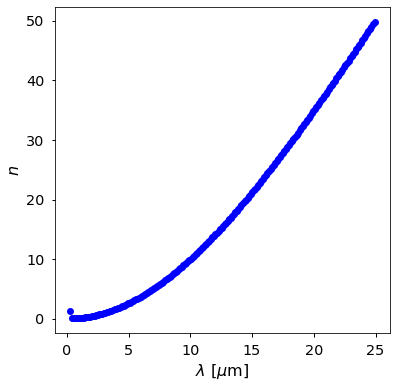

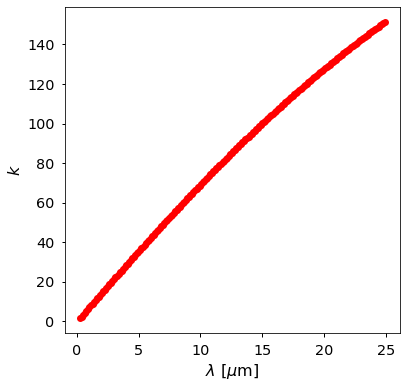

In [55]:
import matplotlib.pyplot as plt
id = 3
wls = grid_data.loc[id, 'wl']
ns = grid_data.loc[id, 'n']
ks = grid_data.loc[id, 'k']
plt.plot(wls, ns, "bo")
plt.xlabel(r"$\lambda$ [$\mu$m]", fontsize=16)
plt.ylabel(r"$n$", fontsize=16)
plt.show()
plt.plot(wls, ks, "ro")
plt.xlabel(r"$\lambda$ [$\mu$m]", fontsize=16)
plt.ylabel(r"$k$", fontsize=16)
plt.show()

# Helper Methods
By using the functionality of Pandas, you may find what you want, easily. But, here some simple helper methods are implemented.


## search(_name_: str) -> DataFrame
This method searches data whose __book__ or __book_name__ contain given _name_ and return a simplified catalog for them.

In [56]:
ri.search("NaCl")

,shelf,book,book_name,page,formula,tabulated,wl_min,wl_max
id,,,,,,,,
182,main,NaCl,NaCl (Sodium chloride),Li,1,f,0.20,30.0000
183,main,NaCl,NaCl (Sodium chloride),Querry,0,nk,0.22,166.6667


In [57]:
ri.search("sodium") # upper or lower case is not significant

,shelf,book,book_name,page,formula,tabulated,wl_min,wl_max
id,,,,,,,,
127,main,NaBr,NaBr (Sodium bromide),Li,1,f,0.210000,34.000000
182,main,NaCl,NaCl (Sodium chloride),Li,1,f,0.200000,30.000000
183,main,NaCl,NaCl (Sodium chloride),Querry,0,nk,0.220000,166.666700
229,main,NaF,NaF (Sodium fluoride),Li,1,f,0.150000,17.000000
295,main,NaI,NaI (Sodium iodide),Jellison,1,f,0.436000,0.633000
296,main,NaI,NaI (Sodium iodide),Li,1,f,0.250000,40.000000
376,main,Na (Solid),Na (Sodium) (Solid),Smith,0,nk,0.312539,2.237982
377,main,Na (Solid),Na (Sodium) (Solid),Inagaki,0,nk,0.326000,2.066000
378,main,Na (Solid),Na (Sodium) (Solid),Monin,0,nk,0.253600,0.620000


## select(_condition_: str) -> DataFrame
This method make a query with the given _condition_ and return a simplified catalog. It will pick up materials whose experimental data contains some data that fulfill given _condition_.

In [58]:
ri.select("2.5 < n < 3 and 0.4 < wl < 0.8").head(10)

,shelf,book,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
23,main,Al (Experimental data),Mathewson,0,nk,0.495940,1.771200
118,main,Bi (Experimental data),Hagemann,0,nk,0.000002,6.199000
129,main,TlBr,Palik,1,f,0.570000,39.400000
135,main,C (Amorphous thin film),Larruquert,0,nk,0.019656,10.079189
137,main,C (Graphite),Djurisic-o,0,nk,0.030996,10.332000
146,main,C (Highly oriented pyrolytic graphite (HOPG)),Song-cHOPG-o,0,nk,0.193000,1.690000
150,main,C (Graphene),Weber,0,nk,0.210873,0.999007
151,main,C (Graphene),El-Sayed,0,nk,0.240000,1.000000
152,main,C (Graphene),Song,0,nk,0.193000,1.690000


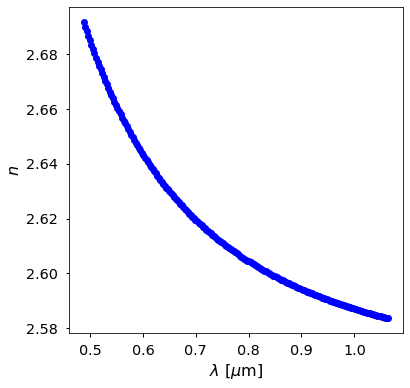

In [59]:
id = 157
import matplotlib.pyplot as plt
plt.plot(grid_data.loc[id, 'wl'], grid_data.loc[id, 'n'], "bo")
plt.xlabel(r"$\lambda$ [$\mu$m]", fontsize=16)
plt.ylabel(r"$n$", fontsize=16)
plt.show()

## show(_ids_: Union[int, Sequence[int]]) -> DataFrame
This method shows a simplified catalog for given _ids_.

In [60]:
ri.show(1)

shelf                                            main
book         Ag (Experimental data: bulk, thick film)
page                                             Choi
formula                                             0
tabulated                                          nk
wl_min                                          1.231
wl_max                                          6.988
Name: 1, dtype: object

## material(id: int, bound_check: bool = True) -> Material
This method returns _Material_-class instance for given _id_. The functionality of _Material_ class is explained below.

In [61]:
id = 428
water = ri.material(id)
water.catalog

shelf                                                      main
shelf_name                    MAIN - simple inorganic materials
division                                  O - Oxygen and oxides
book                                    H2O (Liquid water, H2O)
book_name     H<sub>2</sub>O, D<sub>2</sub>O (Water, heavy w...
page                                                  Kedenburg
path          /home/mnishida/anaconda3/envs/riip/lib/python3...
formula                                                       2
tabulated                                                     k
num_n                                                         0
num_k                                                      1132
wl_n_min                                                    0.5
wl_n_max                                                    1.6
wl_k_min                                                    0.5
wl_k_max                                                    1.6
wl_min                                  

# Material Class:
## Material(catalog: Series, exp_data: DataFrame, bound_check: bool = True)
This class provides the dielectric function for the material specified by the _catalog_ and _exp_data_. If the argument _bound_check_ is True, ValueError is raised when the wavelength exeeds the domain of experimental data.

In [62]:
id = 428
catalog = ri.catalog.loc[id]
exp_data = ri.raw_data.loc[id]
water = riip.Material(catalog, exp_data)
print(f"{catalog['book']} {catalog['page']}")
print(f"{catalog['wl_min']} <= λ <= {catalog['wl_max']}")

H2O (Liquid water, H2O) Kedenburg
0.5 <= λ <= 1.6


## Funcitons for refractive index and permittivity
### n(wls: numpy.ndarray) -> numpy.ndarray
### k(wls: numpy.ndarray) -> numpy.ndarray
  These are methods return the real and imaginary parts of refractive index at the given wavelengths _wls_.
### eps(wls: numpy.ndarray) -> numpy.ndarray
  This method returns the permittivity at the given wavelengths _wls_.

In [63]:
wl = 1.0
n = water.n(wl)
k = water.k(wl)
eps = water.eps(wl)
print(f"At λ={wl}μm:")
print(f"  n={n}")
print(f"  k={k}")
print(f"  ε={eps}")

At λ=1.0μm:
  n=1.3248733548067675
  k=3.19106e-06
  ε=(1.755289406266756+8.455500735179367e-06j)


In [64]:
import numpy as np
wls = np.linspace(0.5, 1.6)
water.eps(wls)

array([1.78768541+5.06456045e-09j, 1.78467437+7.15205496e-09j,
       1.78200425+8.94726970e-09j, 1.77961713+1.08666065e-08j,
       1.77746656+2.03456790e-08j, 1.77551486+3.91797098e-08j,
       1.77373123+4.46648626e-08j, 1.77209021+5.55516860e-08j,
       1.77057063+6.46736868e-08j, 1.76915476+9.55086451e-08j,
       1.7678276 +2.26809001e-07j, 1.76657643+4.35996520e-07j,
       1.76539035+4.41911135e-07j, 1.76425999+3.88897897e-07j,
       1.76317722+3.67527138e-07j, 1.76213497+6.57038199e-07j,
       1.76112705+7.97313691e-07j, 1.76014799+9.89984646e-07j,
       1.75919296+1.26258703e-06j, 1.75825763+2.11417683e-06j,
       1.75733815+5.56077734e-06j, 1.75643103+9.70066579e-06j,
       1.75553309+9.02235619e-06j, 1.75464145+6.69285893e-06j,
       1.75375346+4.42035410e-06j, 1.75286666+3.28212930e-06j,
       1.75197876+3.47790570e-06j, 1.75108763+4.87739542e-06j,
       1.75019124+7.76700844e-06j, 1.74928768+2.35293686e-05j,
       1.74837512+2.93316807e-05j, 1.74745178+3.1702583

## Bound_check
By default, bound_check is set to True, so a ValueError is raised if the given range of wavelength exeeds the domain of experimental data.

In [65]:
wls = np.linspace(1.0, 2.0)  # exeeds the domain of experimental data [wl_min, wl_max]
water.eps(wls)

ValueError: Wavelength [1.0 2.0] is out of bounds [0.5 1.6][um]

If the instance is created with _bound_check_=False, the dispersion formula is applied beyond the scope of experimental data.

In [ ]:
wls = np.linspace(1.0, 2.0)  # exeeds the domain of experimental data [wl_min, wl_max]
water = ri.material(id, bound_check=False)
water.eps(wls)

## plot method

### plot(wls: numpy.ndarray, comp: str = "n", fmt: str = "-", **kwargs)
* wls: Array of wavelength
* comp: 'n', 'k' or 'eps'
* fmt: The plot format string, such as "b-", "k--", "r:" etc.

In [ ]:
water.plot(wls, "n", "k--")

You can change the plot style using rcParams of matplotlib.

In [ ]:
plt.style.use('seaborn-notebook')
plot_params = {
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 'xx-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
    'legend.fontsize': 'x-large',
}
plt.rcParams.update(plot_params)
water.plot(wls, "k", "b-")